In [365]:
# Import standard Python data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

sns.set()
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import chi2_contingency
# Load StatsModels API
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import chi2_contingency

## Step 1

In [397]:
fun = pd.read_csv("fundraising.csv")

missing_values = fun.isnull().sum()
print(missing_values)

# No Missing values 

zipconvert2            0
zipconvert3            0
zipconvert4            0
zipconvert5            0
homeowner              0
num_child              0
income                 0
female                 0
wealth                 0
home_value             0
med_fam_inc            0
avg_fam_inc            0
pct_lt15k              0
num_prom               0
lifetime_gifts         0
largest_gift           0
last_gift              0
months_since_donate    0
time_lag               0
avg_gift               0
target                 0
dtype: int64


In [135]:
fun.head()

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,...,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift,target
0,Yes,No,No,No,Yes,1,1,No,7,698,...,463,4,46,94.0,12.0,12.0,34,6,9.400000,Donor
1,No,No,No,Yes,No,2,5,Yes,8,828,...,376,13,32,30.0,10.0,5.0,29,7,4.285714,Donor
2,No,No,No,Yes,Yes,1,3,No,4,1471,...,546,4,94,177.0,10.0,8.0,30,3,7.080000,No Donor
3,No,Yes,No,No,Yes,1,4,No,8,547,...,432,7,20,23.0,11.0,11.0,30,6,7.666667,No Donor
4,No,Yes,No,No,Yes,1,4,Yes,8,482,...,275,28,38,73.0,10.0,10.0,31,3,7.300000,Donor


In [228]:
fun.describe()

,num_child,income,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift
count,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1.069333,3.899000,6.395667,1143.26800,388.356333,432.310333,14.710333,49.13900,110.740517,16.645863,13.483000,31.132667,6.876000,10.668937
std,0.345301,1.639419,2.546752,952.14572,173.732844,168.903446,12.109637,22.77964,149.380144,22.517663,10.475278,4.095281,5.601763,7.450658
min,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,11.00000,15.000000,5.000000,0.000000,17.000000,0.000000,2.138889
25%,1.000000,3.000000,5.000000,554.75000,278.000000,318.000000,5.000000,29.00000,45.000000,10.000000,7.000000,29.000000,3.000000,6.333333
50%,1.000000,4.000000,8.000000,816.50000,355.000000,396.000000,12.000000,48.00000,81.000000,15.000000,10.000000,31.000000,5.000000,9.000000
75%,1.000000,5.000000,8.000000,1341.25000,465.000000,516.000000,21.000000,65.00000,135.000000,20.000000,16.000000,34.000000,9.000000,12.800000
max,5.000000,7.000000,9.000000,5945.00000,1500.000000,1331.000000,90.000000,157.00000,5674.900000,1000.000000,219.000000,37.000000,77.000000,122.166667


In [398]:
fun['homeowner'] = fun['homeowner'].replace({'Yes':1, 'No':0}) # 1 = female and 0 = male
fun['female'] = fun['female'].replace({'Yes':1, 'No':0}) # 1 = female and 0 = male
fun['zipconvert2'] = fun['zipconvert2'].replace({'Yes':1, 'No':0})
fun['zipconvert3'] = fun['zipconvert3'].replace({'Yes':1, 'No':0})
fun['zipconvert4'] = fun['zipconvert4'].replace({'Yes':1, 'No':0})
fun['zipconvert5'] = fun['zipconvert5'].replace({'Yes':1, 'No':0})
fun['target'] = fun['target'].replace({'Donor':1, 'No Donor':0})


In [140]:
fun.head()

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,...,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift,target
0,1,0,0,0,1,1,1,0,7,698,...,463,4,46,94.0,12.0,12.0,34,6,9.400000,1
1,0,0,0,1,0,2,5,1,8,828,...,376,13,32,30.0,10.0,5.0,29,7,4.285714,1
2,0,0,0,1,1,1,3,0,4,1471,...,546,4,94,177.0,10.0,8.0,30,3,7.080000,0
3,0,1,0,0,1,1,4,0,8,547,...,432,7,20,23.0,11.0,11.0,30,6,7.666667,0
4,0,1,0,0,1,1,4,1,8,482,...,275,28,38,73.0,10.0,10.0,31,3,7.300000,1


In [141]:
fun.describe()

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,...,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,...,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.216000,0.183667,0.214333,0.384667,0.770667,1.069333,3.899000,0.610333,6.395667,1143.26800,...,432.310333,14.710333,49.13900,110.740517,16.645863,13.483000,31.132667,6.876000,10.668937,0.499667
std,0.411583,0.387277,0.410427,0.486598,0.420474,0.345301,1.639419,0.487756,2.546752,952.14572,...,168.903446,12.109637,22.77964,149.380144,22.517663,10.475278,4.095281,5.601763,7.450658,0.500083
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,11.00000,15.000000,5.000000,0.000000,17.000000,0.000000,2.138889,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,5.000000,554.75000,...,318.000000,5.000000,29.00000,45.000000,10.000000,7.000000,29.000000,3.000000,6.333333,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,8.000000,816.50000,...,396.000000,12.000000,48.00000,81.000000,15.000000,10.000000,31.000000,5.000000,9.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,8.000000,1341.25000,...,516.000000,21.000000,65.00000,135.000000,20.000000,16.000000,34.000000,9.000000,12.800000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,1.000000,9.000000,5945.00000,...,1331.000000,90.000000,157.00000,5674.900000,1000.000000,219.000000,37.000000,77.000000,122.166667,1.000000


In [399]:
random.seed(12345)
X_train, X_test, y_train, y_test = train_test_split(fun, fun["target"], test_size = 0.20, random_state = 20)

## Step 2

## Outliers

<Axes: xlabel='target', ylabel='largest_gift'>

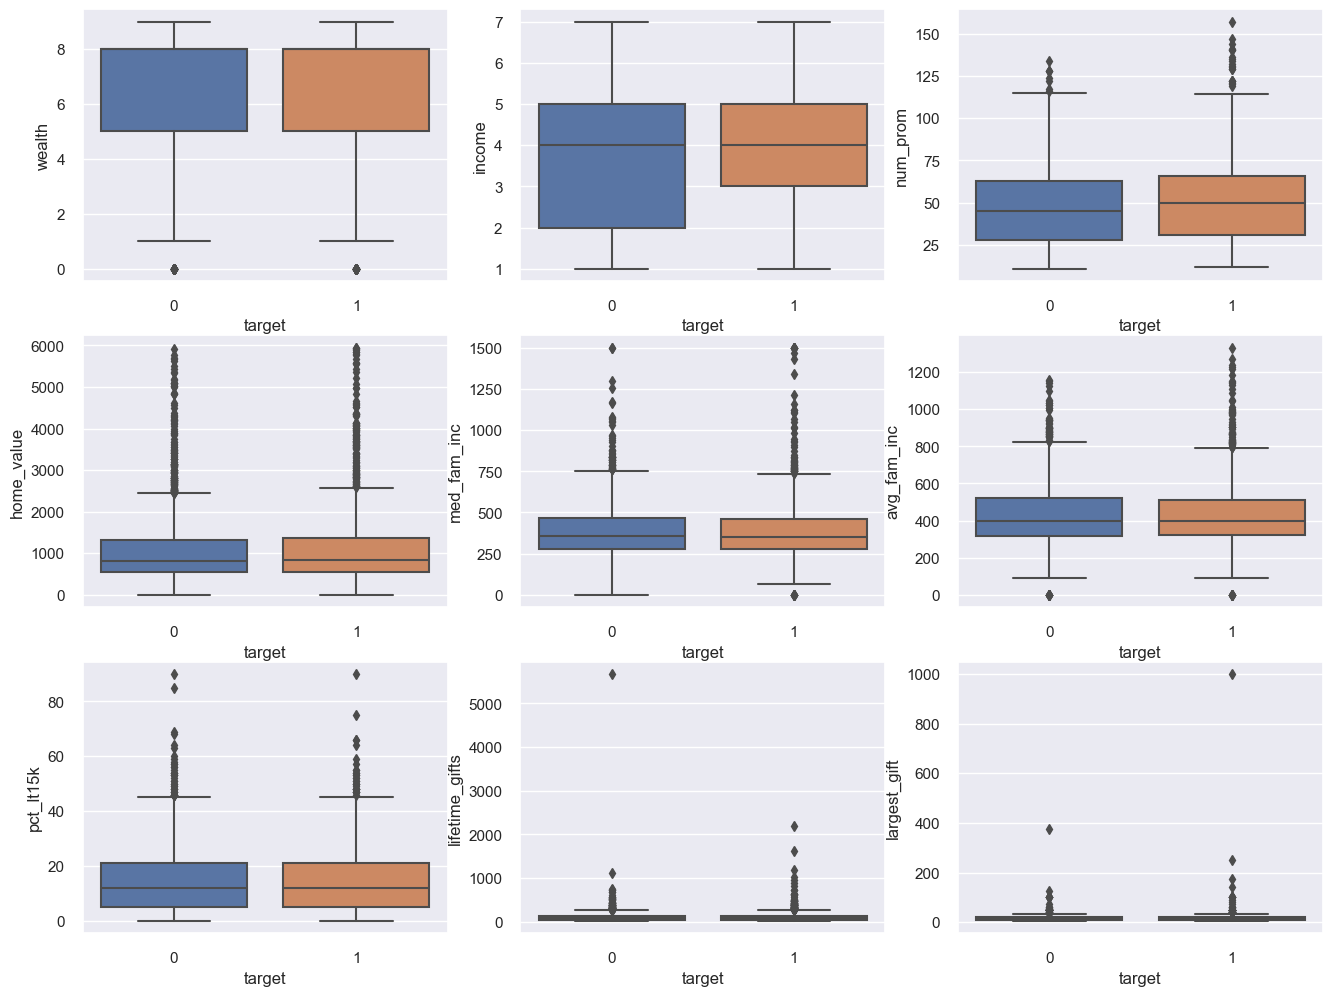

In [143]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (16, 12))
sns.boxplot(x = "target", y = "num_prom", data = fun, ax = axes[0, 2]) # No
sns.boxplot(x = "target", y = "income", data = fun, ax = axes[0, 1])
sns.boxplot(x = "target", y = "wealth", data = fun, ax = axes[0, 0])
sns.boxplot(x = "target", y = "home_value", data = fun, ax = axes[1, 0])
sns.boxplot(x = "target", y = "med_fam_inc", data = fun, ax = axes[1, 1])
sns.boxplot(x = "target", y = "avg_fam_inc", data = fun, ax = axes[1, 2])
sns.boxplot(x = "target", y = "pct_lt15k", data = fun, ax = axes[2, 0])
sns.boxplot(x = "target", y = "lifetime_gifts", data = fun, ax = axes[2, 1])
sns.boxplot(x = "target", y = "largest_gift", data = fun, ax = axes[2, 2])
# Seems that med_fam_inc, home_value, avg_fam_inc, and pct_lt15k have a lot of outliers

<Axes: xlabel='target', ylabel='avg_gift'>

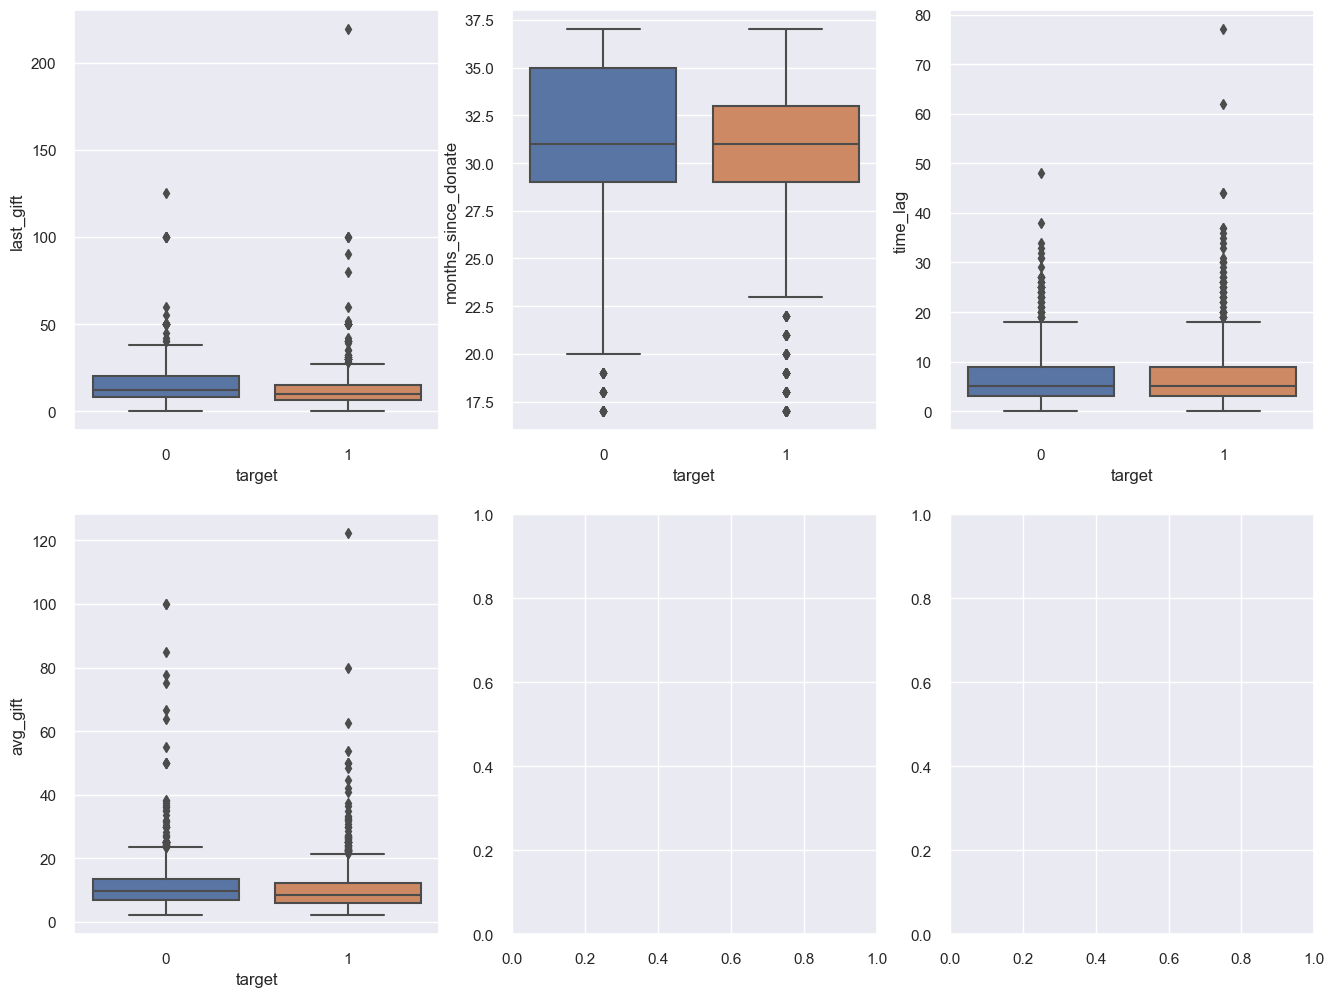

In [288]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 12))
sns.boxplot(x = "target", y = "last_gift", data = fun, ax = axes[0, 0])
sns.boxplot(x = "target", y = "months_since_donate", data = fun, ax = axes[0, 1])
sns.boxplot(x = "target", y = "time_lag", data = fun, ax = axes[0, 2])
sns.boxplot(x = "target", y = "avg_gift", data = fun, ax = axes[1, 0])
# Seems that time_lag and avg_gift have a lot of outliers

In [ ]:
sns.pairplot(fun, hue='target');

Error in callback <function flush_figures at 0x0000019507212660> (for post_execute):


## Mutlicollinarity 

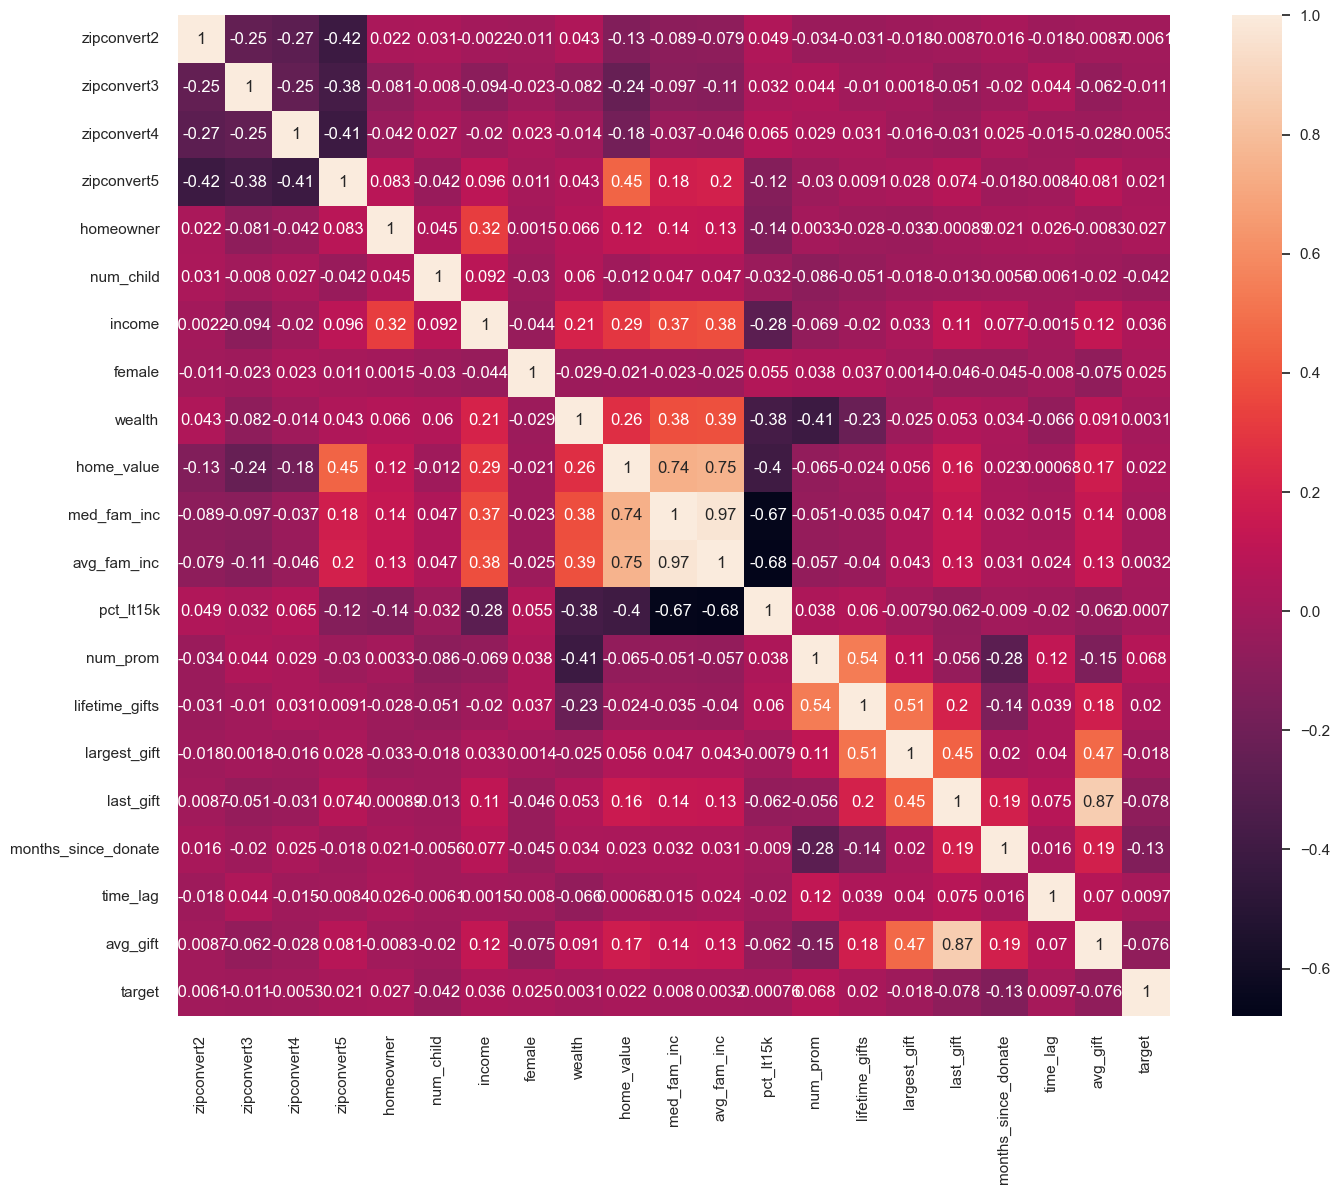

In [400]:
correlation_matrix = fun.corr()
plt.figure(figsize=(16, 13))
sns.heatmap(correlation_matrix, annot=True)
plt.show()           

In [ ]:
# med_fam_inc is higly correlated with avg_fam_inc

In [401]:
fun.drop(columns=['avg_fam_inc'], inplace=True)


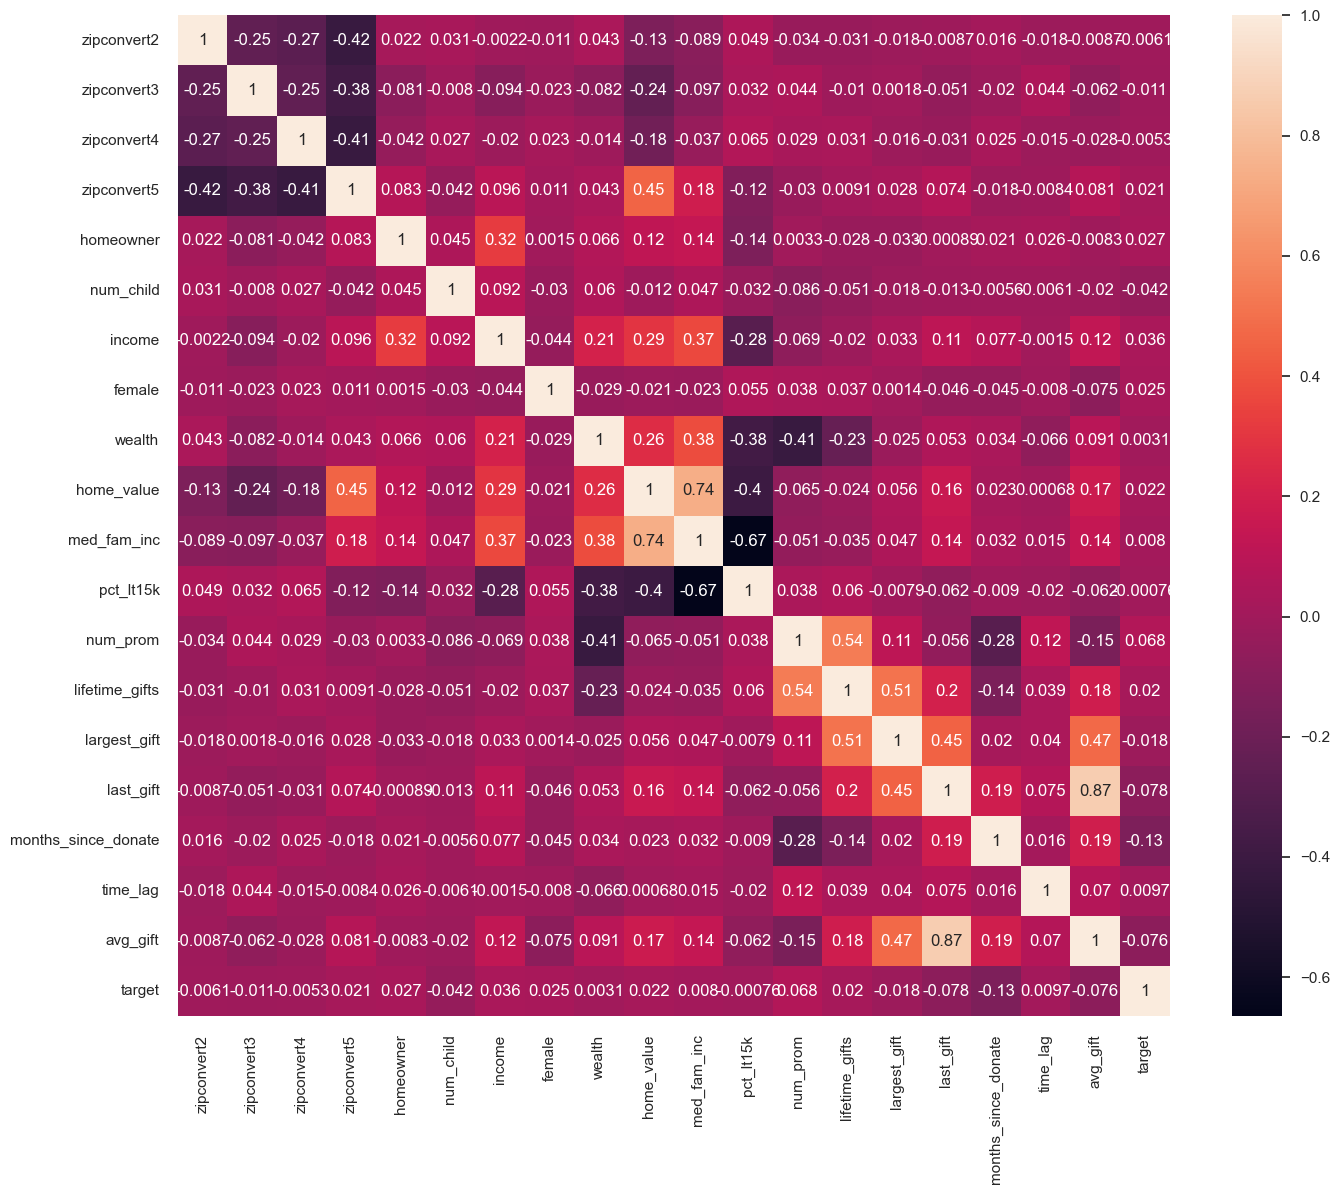

In [402]:
correlation_matrix = fun.corr()
plt.figure(figsize=(16, 13))
sns.heatmap(correlation_matrix, annot=True)
plt.show()          

## Contingency Tables

In [268]:
# Homeowner
contingency_table = pd.crosstab(fun['homeowner'], fun['target'])
print(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)

print("p-value:", p)
# p value of 0.15759 which means it is not very signficant of a relationship to donor 

target        0     1
homeowner            
0           361   327
1          1140  1172
Chi-square statistic: 1.9971738309551441
p-value: 0.15759280914252388


In [12]:
contingency_table = pd.crosstab(fun['female'], fun['target'])
print(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)

target    0    1
female          
0       603  566
1       898  933
Chi-square statistic: 1.7386562921568283
p-value: 0.1873091734995649


In [243]:
contingency_table = pd.crosstab(fun['zipconvert5'], fun['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
# Not very significant to target

target         0    1
zipconvert5          
0            939  907
1            562  592
Chi-square statistic: 1.2480217674974234
p-value: 0.2639306455647189


In [244]:
contingency_table = pd.crosstab(fun['num_child'], fun['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
# Most donors and non donors have one child

target        0     1
num_child            
1          1418  1438
2            51    46
3            22     9
4             9     6
5             1     0
Chi-square statistic: 7.448070861318039
p-value: 0.11402106896145825


In [245]:
contingency_table = pd.crosstab(fun['wealth'], fun['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
# Most donors have 8th as their wealth category 

target    0    1
wealth          
0        56   53
1        61   73
2        67   67
3        81   73
4        79   68
5        98   83
6        71   84
7        75   97
8       824  806
9        89   95
Chi-square statistic: 7.936374705957702
p-value: 0.5405706569709918


In [246]:
contingency_table = pd.crosstab(fun['largest_gift'], fun['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
# p value of 0.00068 which means it does have a significant relationship to target

target          0    1
largest_gift          
5.00           57   83
6.00           38   60
7.00           61   95
8.00           32   36
9.00           22   28
10.00         219  292
11.00          81   69
12.00          80   86
12.50           1    0
13.00          21   28
14.00          21   25
15.00         259  197
16.00          55   36
16.59           0    1
17.00          20   22
17.50           1    0
18.00          10    9
19.00           5    3
20.00         212  185
21.00          24   17
22.00           4    4
23.00           4    4
24.00           6    7
25.00         150  116
26.00           4    8
27.00           8    4
28.00           3    1
30.00          26   21
31.00           0    5
32.00           3    2
33.00           1    0
34.00           1    1
35.00          18    8
36.00           4    0
37.00           2    0
38.00           1    0
40.00           4    9
41.00           0    1
45.00           0    1
50.00          27   18
53.00           1    0
54.00      

In [247]:
contingency_table = pd.crosstab(fun['last_gift'], fun['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
# Also has a significant relationship to target

target       0    1
last_gift          
0.0          2    4
1.0          1    0
2.0          5    8
3.0         31   56
4.0         31   31
5.0        147  197
6.0         51   79
7.0         70   83
7.5          1    0
8.0         39   46
9.0         36   36
10.0       274  294
11.0        36   41
12.0        60   59
13.0        24   22
14.0        26   31
15.0       215  181
16.0        33   26
17.0        14    9
17.5         1    0
18.0         7    3
19.0         3   10
20.0       172  128
21.0        19    8
22.0         4    7
23.0         4    3
24.0         4    8
25.0       121   67
26.0         1    6
27.0         4    3
28.0         1    2
30.0        12   11
31.0         0    4
32.0         3    3
35.0        11    2
36.0         3    0
37.0         1    0
38.0         1    0
39.0         0    1
40.0         2    6
42.0         1    1
45.0         1    0
50.0        20   15
52.0         0    1
55.0         1    0
60.0         1    1
80.0         0    1
90.0         0    1


In [248]:
contingency_table = pd.crosstab(fun['num_prom'], fun['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
# Does not appear to have a significant relationship with the target relationship 

target     0   1
num_prom        
11         1   0
12         2   2
13         3   2
14         4   4
15        19  17
...       ..  ..
140        0   2
141        0   1
144        0   1
147        0   1
157        0   1

[125 rows x 2 columns]
Chi-square statistic: 109.20805816965071
p-value: 0.8255405669587653


In [249]:
contingency_table = pd.crosstab(fun['lifetime_gifts'], fun['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
# Could have a marginal effect but not significant 

target           0   1
lifetime_gifts        
15.0            26  16
16.0             1   0
18.0             2   1
19.0             1   1
20.0            30  31
...             ..  ..
1111.0           1   0
1174.0           0   1
1622.0           0   1
2200.0           0   1
5674.9           1   0

[419 rows x 2 columns]
Chi-square statistic: 453.0250901361603
p-value: 0.1146817970779235


In [250]:
contingency_table = pd.crosstab(fun['months_since_donate'], fun['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
# Significant and most donate after 27 months

target                 0    1
months_since_donate          
17                    13   34
18                    11   18
19                     9   22
20                     2    9
21                     2   10
22                     4    8
23                     5    5
24                     1    5
25                     2    4
26                     6    4
27                     5    2
28                   153  178
29                   173  196
30                   177  216
31                   269  279
32                   134  117
33                    71   64
34                    76   52
35                    47   47
36                   115   72
37                   226  157
Chi-square statistic: 68.37060353057642
p-value: 3.352999151391837e-07


In [215]:
contingency_table = pd.crosstab(fun['time_lag'], fun['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
# Most donors and non donors have a time lag between 2 and 8 

target      0    1
time_lag          
0          18   16
1          86   67
2         122  138
3         156  173
4         174  177
5         240  219
6         126  135
7          88   98
8         109   81
9          72   88
10         38   48
11         42   37
12         50   47
13         38   32
14         31   24
15         25   28
16          9   11
17          8   12
18          9    7
19          8    6
20          6    8
21          4    1
22          4    4
23          6    4
24          6    5
25          9    4
26          4    8
27          5    3
28          0    2
29          1    1
30          0    4
31          2    1
32          1    0
33          1    1
34          1    1
35          0    1
36          0    1
37          0    2
38          1    0
44          0    2
48          1    0
62          0    1
77          0    1
Chi-square statistic: 40.2486812175698
p-value: 0.5480481653400381


In [228]:
contingency_table = pd.crosstab(fun['pct_lt15k'], fun['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
# Could have some impact with a p value of 0.144

target      0   1
pct_lt15k        
0          87  87
1          41  21
2          71  62
3          60  68
4          59  59
...        ..  ..
68          1   0
69          1   0
75          0   1
85          1   0
90          1   1

[69 rows x 2 columns]
Chi-square statistic: 80.43821231726159
p-value: 0.14364533390230017


## KNN

In [330]:
numerical_features = ["income", "num_child", "wealth", "months_since_donate", "pct_lt15k", "last_gift", "time_lag", "avg_gift", "num_prom", "lifetime_gifts", "home_value", "female", "homeowner"]
numerical_transformer = Pipeline([("standardize", StandardScaler())])
preprocessor = ColumnTransformer([("num", numerical_transformer, numerical_features)])

np.random.seed(312)
k_vals = list(range(1, 21, 1))
knn_errors = {}
confusion_matrices = {}
for k in k_vals:
    clf = Pipeline([("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors = k))])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion_matrices[k] = confusion_matrix(y_test, y_pred)
    knn_errors[k] = 1 - clf.score(X_test, y_test)
pd.Series(knn_errors)

1     0.455000
2     0.483333
3     0.485000
4     0.490000
5     0.483333
6     0.486667
7     0.476667
8     0.488333
9     0.468333
10    0.450000
11    0.465000
12    0.460000
13    0.476667
14    0.455000
15    0.465000
16    0.458333
17    0.451667
18    0.446667
19    0.460000
20    0.456667
dtype: float64

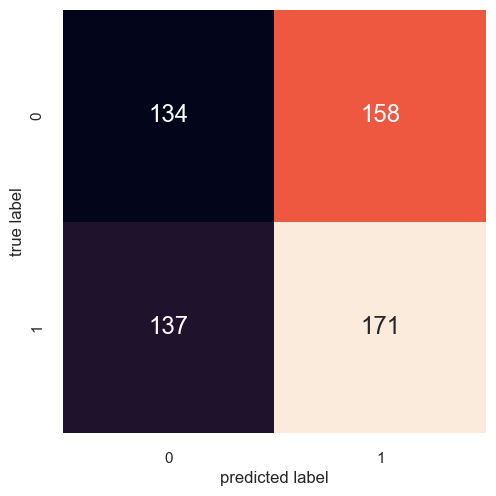

In [281]:
mat = confusion_matrices[pd.Series(knn_errors).idxmin()]
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf["classifier"].classes_, yticklabels = clf["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [278]:
numerical_features = ["largest_gift", "last_gift", "num_prom","months_since_donate", "avg_gift", "med_fam_inc", "home_value"]
numerical_transformer = Pipeline([("standardize", StandardScaler())])
preprocessor = ColumnTransformer([("num", numerical_transformer, numerical_features)])

np.random.seed(312)
k_vals = list(range(1, 21, 2))
knn_errors = {}
confusion_matrices = {}
for k in k_vals:
    clf_KNN = Pipeline([("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors = k))])
    clf_KNN.fit(X_train_KNN, y_train)
    y_pred = clf_KNN.predict(X_test)
    confusion_matrices[k] = confusion_matrix(y_test, y_pred)
    knn_errors[k] = 1 - clf_KNN.score(X_test_KNN, y_test)
pd.Series(knn_errors)

1     0.485000
3     0.481667
5     0.480000
7     0.486667
9     0.481667
11    0.470000
13    0.473333
15    0.486667
17    0.491667
19    0.471667
dtype: float64

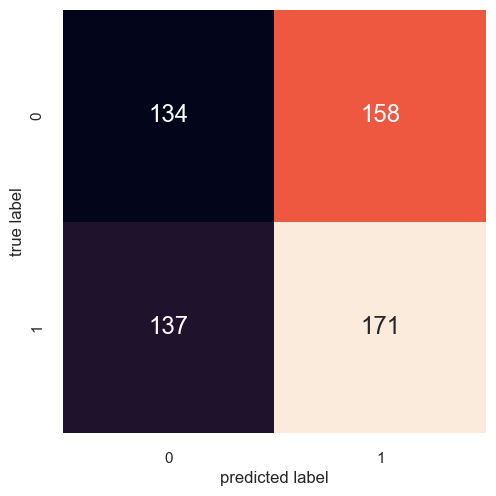

In [282]:
mat = confusion_matrices[pd.Series(knn_errors).idxmin()]
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf_KNN["classifier"].classes_, yticklabels = clf_KNN["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

## With Significant predictors

In [311]:
from sklearn.metrics import mean_squared_error

In [366]:

numerical_features = numerical_features = ["largest_gift", "last_gift", "num_prom",
                                            "months_since_donate", "avg_gift", "med_fam_inc"]
numerical_transformer = Pipeline([("standardize", StandardScaler())])
preprocessor = ColumnTransformer([("num", numerical_transformer, numerical_features)])

np.random.seed(312)
k_vals = list(range(1, 21, 2))
knn_errors = {}
confusion_matrices = {}
for k in k_vals:
    clf_KNN_f = Pipeline([("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors = k))])
    clf_KNN_f.fit(X_train, y_train)
    y_pred = clf_KNN_f.predict(X_test)
    confusion_matrices[k] = confusion_matrix(y_test, y_pred)
    knn_errors[k] = 1 - clf_KNN_f.score(X_test, y_test)
pd.Series(knn_errors)

1     0.505000
3     0.478333
5     0.453333
7     0.448333
9     0.461667
11    0.451667
13    0.453333
15    0.446667
17    0.443333
19    0.440000
dtype: float64

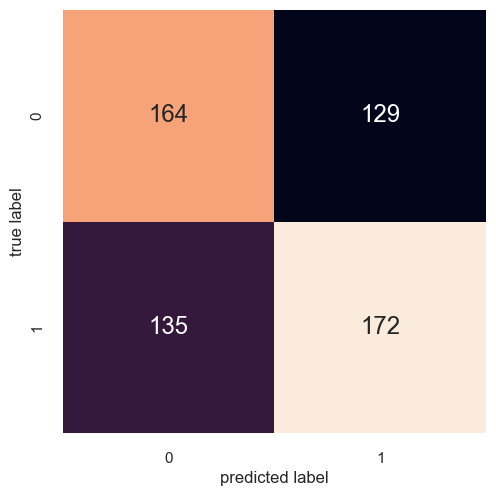

In [367]:
mat = confusion_matrices[pd.Series(knn_errors).idxmin()]
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf_KNN_f["classifier"].classes_, yticklabels = clf_KNN_f["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

## SVM

In [320]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [394]:
random.seed(12345)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)



scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_clf_f = svm.SVC()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear'], 'gamma': ['scale', 'auto']}

In [395]:
grid_search = GridSearchCV(svm_clf_f, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_svm_clf = grid_search.best_estimator_
y_pred_svm = best_svm_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.5683333333333334


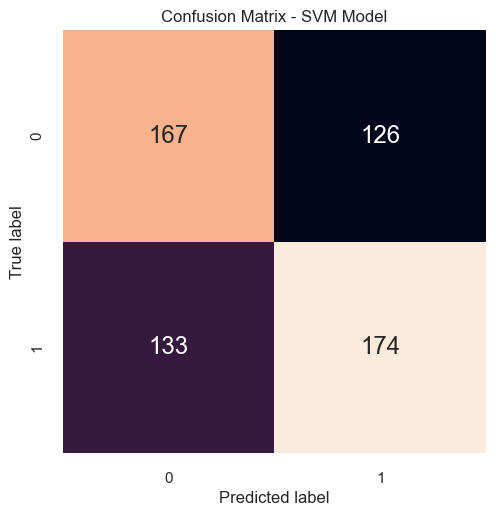

In [396]:
fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, cbar=False, ax=ax, fmt='g', square=True, annot_kws={"fontsize": "x-large"},
            xticklabels=best_svm_clf_f.classes_, yticklabels=best_svm_clf.classes_)
ax.set(xlabel="Predicted label", ylabel="True label")
plt.title('Confusion Matrix - SVM Model')
plt.show()

## With numerical_features variables

In [350]:
random.seed(12345)
numerical_features = numerical_features = ["largest_gift", "last_gift", "num_prom",
                                            "months_since_donate", "avg_gift", "med_fam_inc"]
X_train_selected = x_train[numerical_features]
X_test_selected = x_test[numerical_features]

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_clf = svm.SVC()

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear'], 'gamma': ['scale', 'auto']}

In [390]:
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_svm_clf = grid_search.best_estimator_
y_pred_svm = best_svm_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.5683333333333334


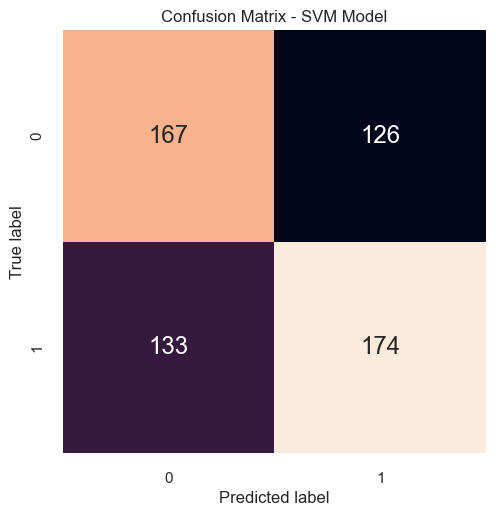

In [391]:
fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, cbar=False, ax=ax, fmt='g', square=True, annot_kws={"fontsize": "x-large"},
            xticklabels=best_svm_clf.classes_, yticklabels=best_svm_clf.classes_)
ax.set(xlabel="Predicted label", ylabel="True label")
plt.title('Confusion Matrix - SVM Model')
plt.show()

## Forest

In [382]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X = fun.drop(columns=['target'])
y = fun['target']

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=20)


# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.53      0.56      0.54       293
           1       0.55      0.52      0.54       307

    accuracy                           0.54       600
   macro avg       0.54      0.54      0.54       600
weighted avg       0.54      0.54      0.54       600



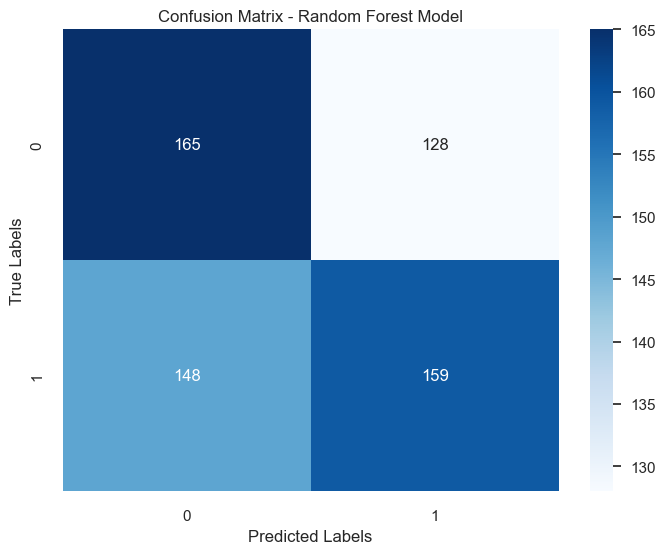

In [384]:
y_pred_rf = rf_classifier.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()


In [339]:
y_pred_rf = rf_classifier.predict(funt)

In [340]:
predicted_labels = ['Donor' if pred == 1 else 'No Donor' for pred in y_pred_rf]
predictions_df6 = pd.DataFrame({'value': predicted_labels})
predictions_df6.to_csv('predictions_RF_Final.csv', index=False)

## With numerical_features

In [375]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


numerical_features = ["largest_gift", "last_gift", "num_prom","months_since_donate","num_child", 
                      "avg_gift", "med_fam_inc", "home_value", "female"]
X_train_selected = X_train[numerical_features]
X_test_selected = X_test[numerical_features]

rf_classifier_f = RandomForestClassifier(n_estimators=100, random_state=20)

# Train the classifier
rf_classifier_f.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_rf_f = rf_classifier_f.predict(X_test_selected)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred_rf_f)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(y_test, y_pred_rf_f))


Accuracy: 0.54
              precision    recall  f1-score   support

           0       0.53      0.57      0.55       293
           1       0.55      0.51      0.53       307

    accuracy                           0.54       600
   macro avg       0.54      0.54      0.54       600
weighted avg       0.54      0.54      0.54       600



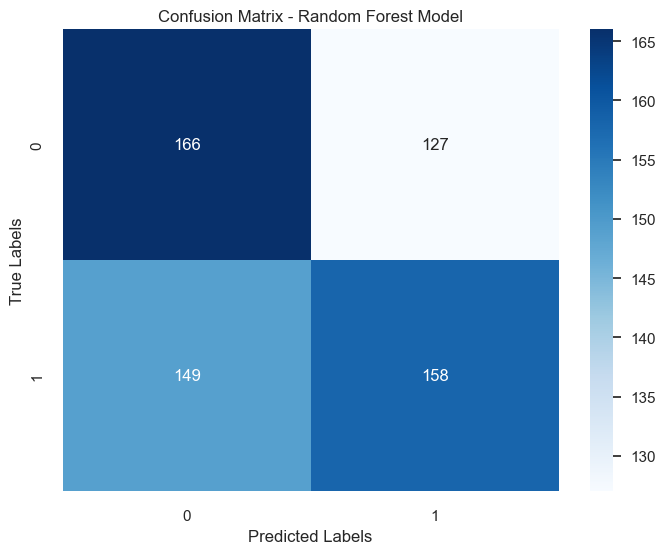

In [380]:


y_pred_rf_f = rf_classifier_f.predict(X_test_selected)

conf_matrix = confusion_matrix(y_test, y_pred_rf_f)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()


## Evaluate fit/Best fit

In [377]:
# For Random Forest
y_pred_rf_prob = rf_classifier_f.predict_proba(X_test_selected)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_rf_prob)

# For SVM
svm_clf_f.fit(X_train_scaled, y_train)
y_pred_svm_prob = svm_clf_f.decision_function(X_test_scaled)
svm_fpr, svm_tpr, _ = roc_curve(y_test, y_pred_svm_prob)

# For KNN
knn_model = clf_KNN_f.fit(X_train, y_train)
y_pred_knn_prob = knn_model.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(y_test, y_pred_knn_prob)


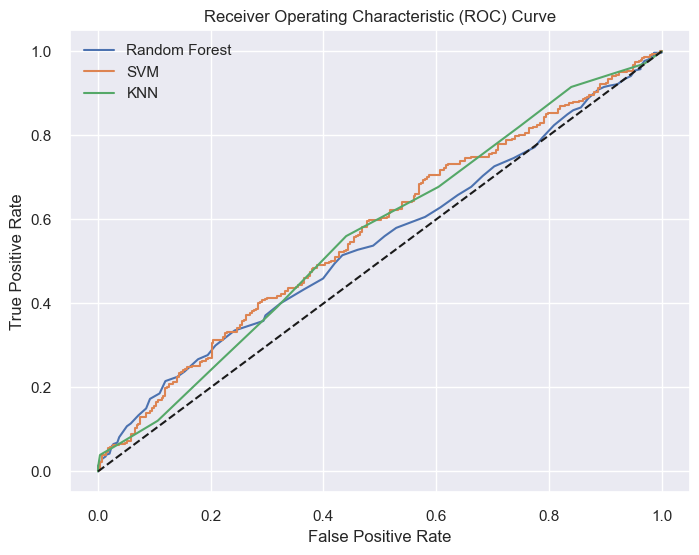

In [378]:
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(svm_fpr, svm_tpr, label='SVM')
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [379]:
# For Random Forest
rf_auc = roc_auc_score(y_test, y_pred_rf_prob)
print("Random Forest AUC:", rf_auc)

# For SVM
svm_auc = roc_auc_score(y_test, y_pred_svm_prob)
print("SVM AUC:", svm_auc)

# For KNN
knn_auc = roc_auc_score(y_test, y_pred_knn_prob)
print("KNN AUC:", knn_auc)


Random Forest AUC: 0.5442074018076509
SVM AUC: 0.5692766061522384
KNN AUC: 0.5621727384909563


## Output Results

In [356]:
funt = pd.read_csv("future_fundraising.csv")
funt.head()

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,med_fam_inc,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift
0,No,Yes,No,No,Yes,1,5,Yes,9,1399,637,703,1,74,102.0,6.0,5.0,29,3,4.857143
1,Yes,No,No,No,Yes,1,1,No,7,1355,411,497,9,77,249.0,15.0,7.0,35,3,9.576923
2,No,No,No,Yes,Yes,1,4,Yes,1,835,310,364,22,70,126.0,6.0,6.0,34,8,4.344828
3,No,No,Yes,No,Yes,1,4,No,8,1019,389,473,15,21,26.0,16.0,16.0,37,5,13.000000
4,No,Yes,No,No,Yes,1,2,Yes,7,992,524,563,6,63,100.0,20.0,3.0,21,6,7.692308


In [357]:
funt.drop(columns=['avg_fam_inc'], inplace=True)
#funt.drop(columns=['med_fam_inc'], inplace=True)

In [358]:
funt['homeowner'] = funt['homeowner'].replace({'Yes':1, 'No':0}) # 1 = female and 0 = male
funt['female'] = funt['female'].replace({'Yes':1, 'No':0}) # 1 = female and 0 = male
funt['zipconvert2'] = funt['zipconvert2'].replace({'Yes':1, 'No':0})
funt['zipconvert3'] = funt['zipconvert3'].replace({'Yes':1, 'No':0})
funt['zipconvert4'] = funt['zipconvert4'].replace({'Yes':1, 'No':0})
funt['zipconvert5'] = funt['zipconvert5'].replace({'Yes':1, 'No':0})
funt.head()

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,med_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift
0,0,1,0,0,1,1,5,1,9,1399,637,1,74,102.0,6.0,5.0,29,3,4.857143
1,1,0,0,0,1,1,1,0,7,1355,411,9,77,249.0,15.0,7.0,35,3,9.576923
2,0,0,0,1,1,1,4,1,1,835,310,22,70,126.0,6.0,6.0,34,8,4.344828
3,0,0,1,0,1,1,4,0,8,1019,389,15,21,26.0,16.0,16.0,37,5,13.000000
4,0,1,0,0,1,1,2,1,7,992,524,6,63,100.0,20.0,3.0,21,6,7.692308


## SVM Predictions

In [76]:
y_pred_svm = best_svm_clf.predict(funt)

In [ ]:
predicted_labels = ['Donor' if pred == 1 else 'No Donor' for pred in y_pred_svm]
predictions_df = pd.DataFrame({'value': predicted_labels})
predictions_df.to_csv('predictions_svm_final.csv', index=False)

## KNN Predictions

In [361]:
y_pred_knn = clf_KNN_f.predict(funt)

In [362]:
predicted_labels = ['Donor' if pred == 1 else 'No Donor' for pred in y_pred_knn]
predictions_knn = pd.DataFrame({'value': predicted_labels})
predictions_knn.to_csv('predictions_KNN_final.csv', index=False)

## Random Forest Predictions

In [ ]:
predicted_labels = ['Donor' if pred == 1 else 'No Donor' for pred in y_pred_knn]
predictions_knn = pd.DataFrame({'value': predicted_labels})
predictions_knn.to_csv('predictions_KNN_final.csv', index=False)